Назви колонок: ['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline']
Розмір датасету: (178, 13)


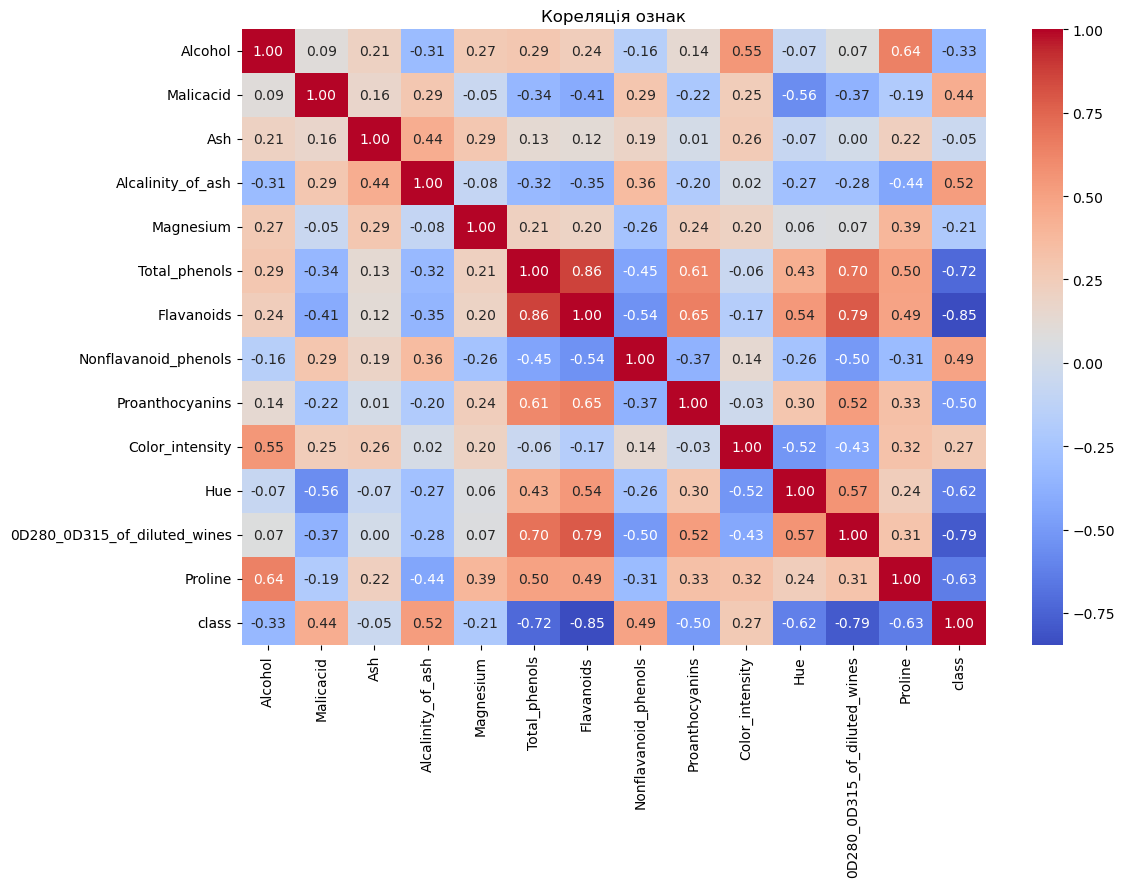

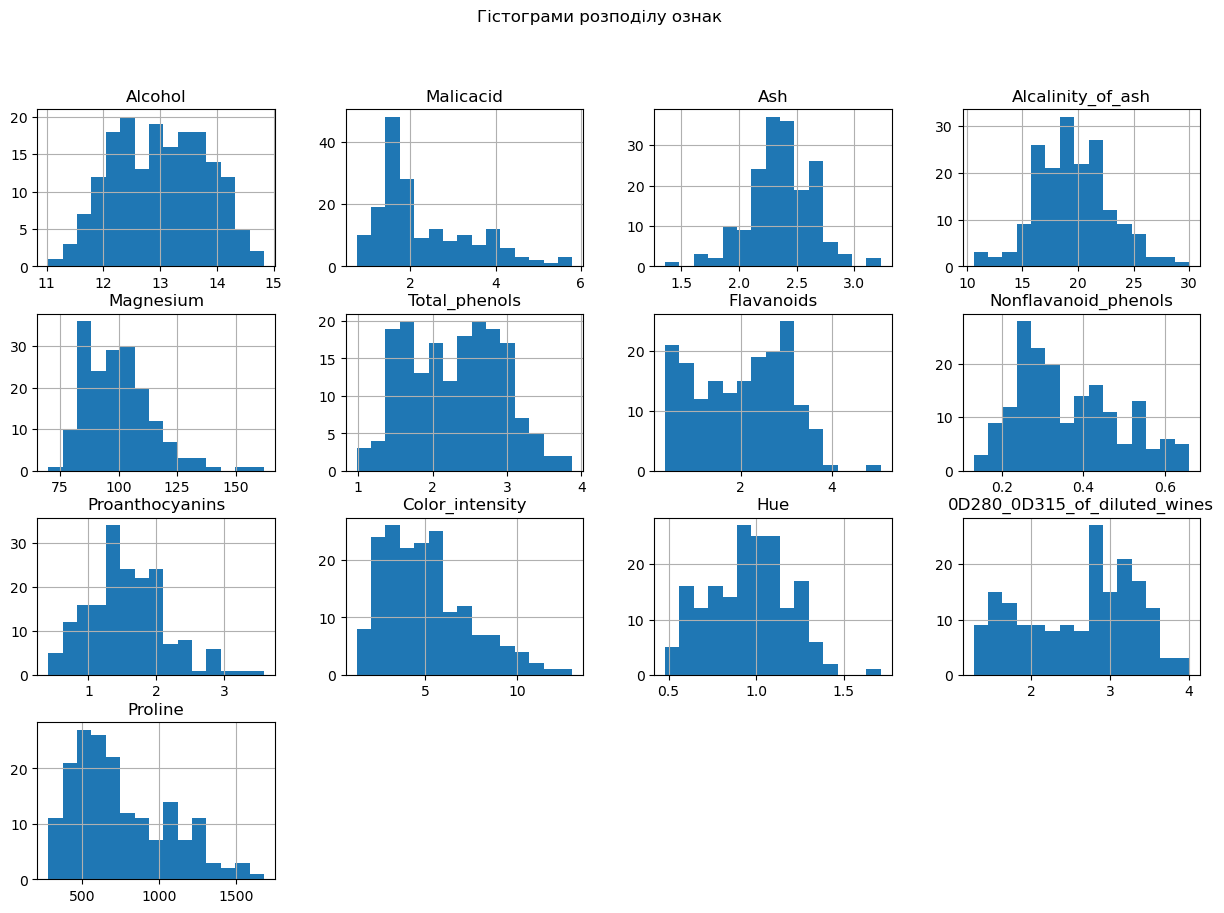

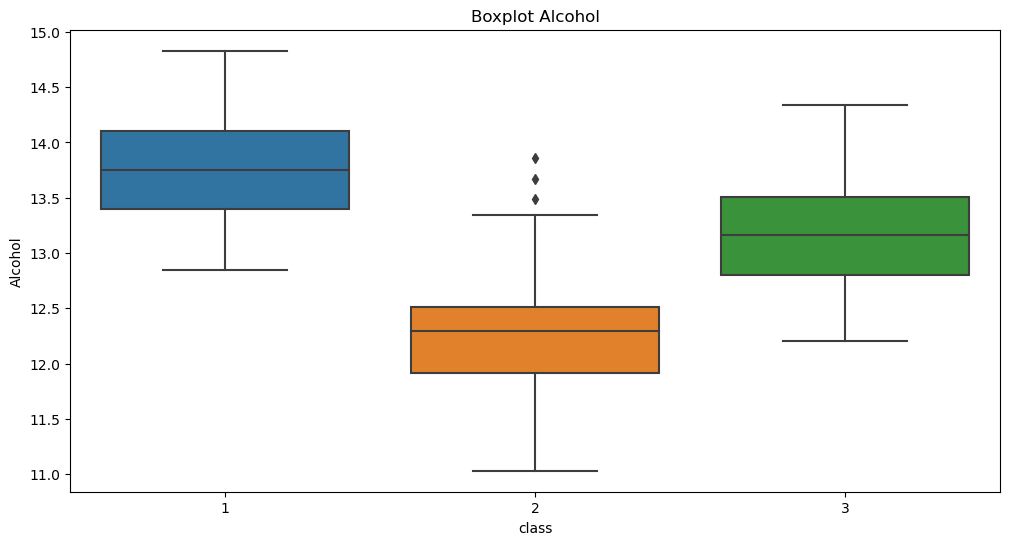

In [18]:

wine = fetch_ucirepo(id=109)
X = pd.DataFrame(wine.data.features, columns=wine.data.feature_names)
y = pd.Series(np.array(wine.data.targets).flatten(), name='class')

print("Назви колонок:", X.columns.tolist())
print("Розмір датасету:", X.shape)

X.fillna(X.mean(), inplace=True)


plt.figure(figsize=(12, 8))
correlation = pd.concat([X, y], axis=1).corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Кореляція ознак')
plt.show()

X.hist(bins=15, figsize=(15, 10))
plt.suptitle('Гістограми розподілу ознак')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='class', y='Alcohol', data=pd.concat([X, y], axis=1))
plt.title('Boxplot Alcohol')
plt.show()


              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.93      1.00      0.97        14
           3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



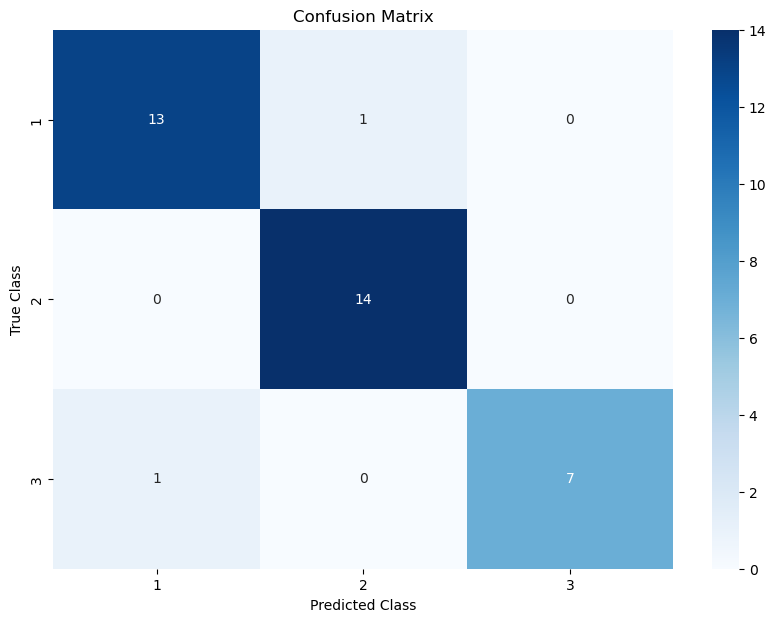

In [6]:
#DESICION TREE
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

wine = fetch_ucirepo(id=109)
X = pd.DataFrame(wine.data.features, columns=wine.data.feature_names)
y = pd.Series(np.array(wine.data.targets).flatten(), name='class')

X.fillna(X.mean(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()



[[12  2  0]
 [ 0 14  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

           1       1.00      0.86      0.92        14
           2       0.82      1.00      0.90        14
           3       1.00      0.88      0.93         8

    accuracy                           0.92        36
   macro avg       0.94      0.91      0.92        36
weighted avg       0.93      0.92      0.92        36



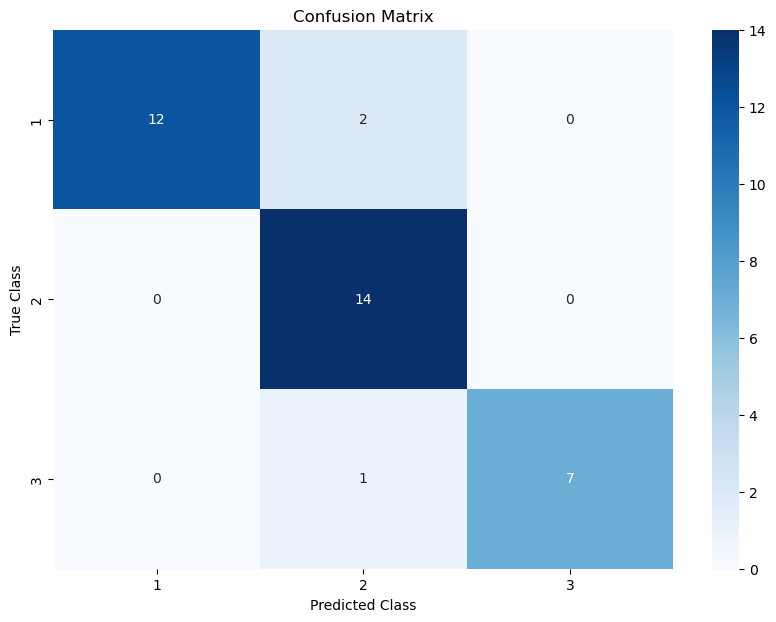

In [15]:
# ADA BOOST

from sklearn.ensemble import AdaBoostClassifier


wine = fetch_ucirepo(id=109)
X = pd.DataFrame(wine.data.features, columns=wine.data.feature_names)
y = pd.Series(np.array(wine.data.targets).flatten(), name='class')

X.fillna(X.mean(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

clf = AdaBoostClassifier(n_estimators=50)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       1.00      0.90      0.95        21
           3       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



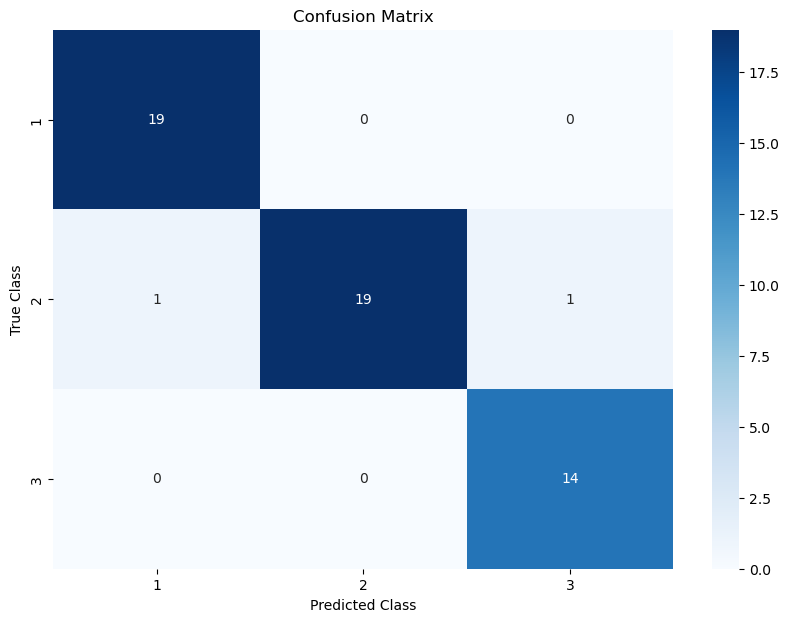

In [12]:
#kNN

from sklearn.neighbors import KNeighborsClassifier


wine = fetch_ucirepo(id=109)
X = pd.DataFrame(wine.data.features, columns=wine.data.feature_names)
y = wine.data.targets


X_cleaned = X.dropna()
y_cleaned = y[:len(X_cleaned)]

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_cleaned)
X_normalized_df = pd.DataFrame(X_normalized, columns=X_cleaned.columns)

X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y_cleaned, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



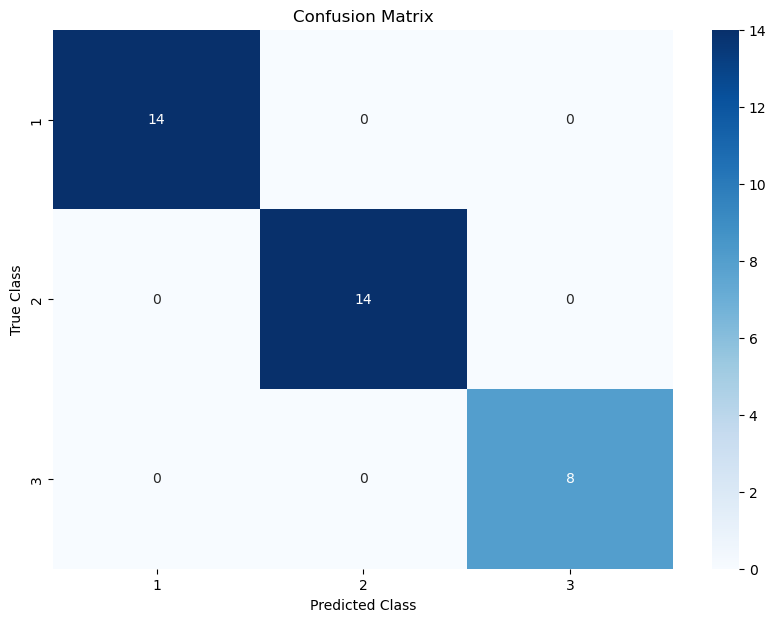

In [16]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

wine = fetch_ucirepo(id=109)
X = pd.DataFrame(wine.data.features, columns=wine.data.feature_names)
y = pd.Series(np.array(wine.data.targets).flatten(), name='class')

X.fillna(X.mean(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



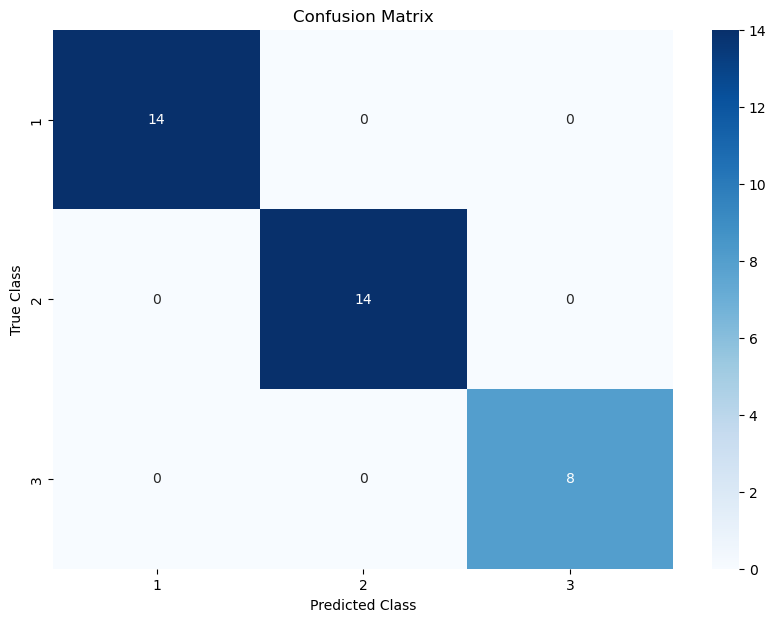

In [17]:
# SVC 
from sklearn.svm import SVC

wine = fetch_ucirepo(id=109)
X = pd.DataFrame(wine.data.features, columns=wine.data.feature_names)
y = pd.Series(np.array(wine.data.targets).flatten(), name='class')

X.fillna(X.mean(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
clf = SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

